In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('../Data/df_transformed.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.columns

Index(['LBXTC', 'RIAGENDR', 'RIDRETH3', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI',
       'BPXPLS', 'BPXPULS', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA', 'DR1_300',
       'ALQ120Q', 'ALQ120U', 'ALQ130', 'BPQ020', 'BPQ050A', 'BPQ080',
       'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681', 'PAQ610', 'PAD615', 'PAQ625',
       'PAD630', 'PAQ655', 'PAD660', 'PAQ670', 'PAD675', 'Systolic',
       'Diastolic', 'outlier', 'MET_work', 'MET_rec', 'DR1TKCAL_t',
       'DR1TPROT_t', 'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t',
       'DR1TSFAT_t', 'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t',
       'DR1TVD_t', 'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t', 'avgALC',
       'log_LBXTC'],
      dtype='object')

In [4]:

cat_variables = ['RIAGENDR','RIDRETH3','ALQ120U','BPQ020', 'BPQ050A', 'BPQ080',
       'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681']
numeric_variables = ['RIDAGEYR','BMXWT', 'BMXHT','BPXPLS','Systolic',
       'Diastolic', 'ALQ120Q','ALQ130', 'MET_rec', 'DR1TKCAL_t',
       'DR1TPROT_t', 'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t',
       'DR1TSFAT_t', 'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t',
       'DR1TVD_t', 'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t']
df2 = df[cat_variables+numeric_variables+['LBXTC']].copy()
df2.dropna(inplace=True)
df2.shape

(3551, 35)

In [5]:
y = df2['LBXTC']
X = df2.drop('LBXTC',axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=675, test_size=0.2)

In [7]:
def build_model():
    model = Sequential([
        Dense(1024, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(1),
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [8]:
numeric_transformer = Pipeline(steps=[('scalar',StandardScaler())])
cat_transformer = Pipeline(steps=[('one_hot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_variables),
    ('cat',cat_transformer,cat_variables)])
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('mlp', KerasRegressor(build_fn=build_model, epochs=25, batch_size=5, verbose=2))])

In [9]:
results = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error')

Epoch 1/25
455/455 - 4s - loss: 18552.1074
Epoch 2/25
455/455 - 4s - loss: 1818.9943
Epoch 3/25
455/455 - 4s - loss: 1748.8116
Epoch 4/25
455/455 - 4s - loss: 1790.6599
Epoch 5/25
455/455 - 4s - loss: 1698.1521
Epoch 6/25
455/455 - 4s - loss: 1718.2839
Epoch 7/25
455/455 - 4s - loss: 1693.8547
Epoch 8/25
455/455 - 4s - loss: 1677.3573
Epoch 9/25
455/455 - 4s - loss: 1688.6307
Epoch 10/25
455/455 - 4s - loss: 1642.0258
Epoch 11/25
455/455 - 4s - loss: 1672.3744
Epoch 12/25
455/455 - 4s - loss: 1675.6200
Epoch 13/25
455/455 - 4s - loss: 1658.1377
Epoch 14/25
455/455 - 4s - loss: 1632.1000
Epoch 15/25
455/455 - 4s - loss: 1627.8499
Epoch 16/25
455/455 - 4s - loss: 1609.5050
Epoch 17/25
455/455 - 4s - loss: 1655.6965
Epoch 18/25
455/455 - 4s - loss: 1631.1537
Epoch 19/25
455/455 - 4s - loss: 1608.7417
Epoch 20/25
455/455 - 4s - loss: 1618.0637
Epoch 21/25
455/455 - 4s - loss: 1627.2108
Epoch 22/25
455/455 - 4s - loss: 1572.5149
Epoch 23/25
455/455 - 4s - loss: 1583.9478
Epoch 24/25
455/455

In [10]:
print(results.mean(),results.std())

-35.140458541352984 3.392359774114834


In [11]:
pipeline.fit(X_train,y_train)

Epoch 1/25
568/568 - 6s - loss: 14932.9902
Epoch 2/25
568/568 - 5s - loss: 1774.8647
Epoch 3/25
568/568 - 5s - loss: 1709.6311
Epoch 4/25
568/568 - 5s - loss: 1737.3495
Epoch 5/25
568/568 - 5s - loss: 1681.1997
Epoch 6/25
568/568 - 5s - loss: 1679.2644
Epoch 7/25
568/568 - 5s - loss: 1669.3114
Epoch 8/25
568/568 - 5s - loss: 1625.9613
Epoch 9/25
568/568 - 6s - loss: 1643.1769
Epoch 10/25
568/568 - 5s - loss: 1622.9630
Epoch 11/25
568/568 - 5s - loss: 1616.8022
Epoch 12/25
568/568 - 5s - loss: 1636.3607
Epoch 13/25
568/568 - 5s - loss: 1596.3256
Epoch 14/25
568/568 - 5s - loss: 1614.8556
Epoch 15/25
568/568 - 5s - loss: 1596.6655
Epoch 16/25
568/568 - 5s - loss: 1625.9697
Epoch 17/25
568/568 - 5s - loss: 1587.7891
Epoch 18/25
568/568 - 5s - loss: 1587.0688
Epoch 19/25
568/568 - 5s - loss: 1586.4379
Epoch 20/25
568/568 - 5s - loss: 1587.8749
Epoch 21/25
568/568 - 5s - loss: 1579.6738
Epoch 22/25
568/568 - 5s - loss: 1581.9380
Epoch 23/25
568/568 - 5s - loss: 1572.5021
Epoch 24/25
568/568

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['RIDAGEYR', 'BMXWT', 'BMXHT',
                                                   'BPXPLS', 'Systolic',
                                                   'Diastolic', 'ALQ120Q',
                                                   'ALQ130', 'MET_rec',
                                                   'DR1TKCAL_t', 'DR1TPROT_t',
                                                   'DR1TCARB_t', 'DR1TSUGR_t',
                                                   'DR1TFIBE_t', 'DR1TTFAT_t',
                                                   'DR1TSFAT_t', 'DR1TMFAT_t',
                                                   'DR1TPFAT_t', 'DR1TCHOL_t',
                                                 

In [12]:
y_preds = pipeline.predict(X_train)

568/568 - 1s


In [13]:
mean_absolute_error(y_train,y_preds)

34.3886186828076

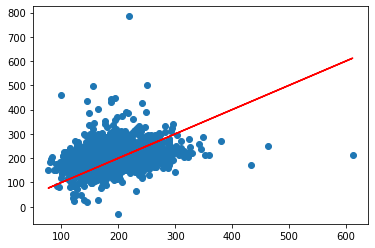

In [14]:
plt.scatter(y_train, y_preds)
plt.plot(y_train, y_train, color="red")